In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import re

In [4]:
data = pd.read_csv('enhanced_curriculum_table.csv')

In [5]:
data['Prerequisites'] = data['Prerequisites'].astype(str).str.strip().replace('NaN', np.nan)

In [6]:
def extract_courses(prereq):
    if pd.isna(prereq):
        return[]
    courses = re.findall(r"[A-Z]{2,4}\s*\d{3}", prereq)
    return list(dict.fromkeys(courses))

In [7]:
data["Cleaned_Prereqs"] = data["Prerequisites"].apply(extract_courses)
data

,Major Code,Major Title,Plan Title,Course ID,Course Name,Year Level,Term Season,Fifth Year,Credits,Credits Minimum,Prerequisites,Has Prerequisites,Cleaned_Prereqs
0,3576,"Chemistry, BA",Chemistry - Plan B,Electives,Course name not found in registrar data,Freshman,Fall,No,120,3,nan,False,[]
1,3576,"Chemistry, BA",Chemistry - Plan B,Electives,Course name not found in registrar data,Freshman,Spring,No,120,3,nan,False,[]
2,3576,"Chemistry, BA",Chemistry - Plan B,IAH Below 211,Course name not found in registrar data,Freshman,Spring,No,120,4,nan,False,[]
3,3576,Chemistry,Chemistry BA - Plan A,IAH Below 211,Course name not found in registrar data,Freshman,Spring,No,120,4,nan,False,[]
4,3576,"Chemistry, BA",Chemistry - Plan B,ISS 200-Level,Course name not found in registrar data,Freshman,Fall,No,120,4,nan,False,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,7132,"Integrative Biology, BS",Integrative Biology (MTH 132),IBIO 341,Fundamental Genetics,Senior,Fall,No,120,4,BS 161 OR BS 161 OR BS 161,True,[BS 161]
4389,7132,"Integrative Biology, BS",Integrative Biology (MTH 103),IBIO 445,Evolution (W),Senior,Spring,No,120,3,IBIO 341 OR IBIO 341 OR IBIO 341 OR IBIO 341,True,[IBIO 341]
4390,7132,"Integrative Biology, BS",Integrative Biology (MTH 116),IBIO 445,Evolution (W),Senior,Spring,No,120,3,IBIO 341 OR IBIO 341 OR IBIO 341 OR IBIO 341,True,[IBIO 341]
4391,7132,"Integrative Biology, BS",Integrative Biology (MTH 124),IBIO 445,Evolution (W),Senior,Spring,No,120,3,IBIO 341 OR IBIO 341 OR IBIO 341 OR IBIO 341,True,[IBIO 341]


In [8]:
G = nx.DiGraph()
for _, row in data.iterrows():
    course_id = row["Course ID"]
    G.add_node(course_id, 
               name=row["Course Name"],
               major=row["Major Code"],
               year=row["Year Level"],
               term=row["Term Season"],
               credits=row["Credits"],
               has_prereq=row["Has Prerequisites"])

In [9]:
for _, row in data.iterrows():
    course = row["Course ID"]
    prereqs = row["Cleaned_Prereqs"]
    for p in prereqs:
        G.add_edge(p, course)  # Directed edge prereq → course

In [10]:
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print("Sample edges:")
print(list(G.edges())[:10])

Total nodes: 306
Total edges: 198
Sample edges:
[('MTH 103', 'CEM 141'), ('MTH 103', 'MTH 114'), ('MTH 103', 'MTH 124'), ('MTH 103', 'STT 224'), ('MTH 116', 'MTH 132'), ('MTH 116', 'CEM 151'), ('CEM 141', 'CEM 142'), ('CEM 141', 'CEM 161'), ('CEM 141', 'CEM 251'), ('CEM 141', 'BS 161')]


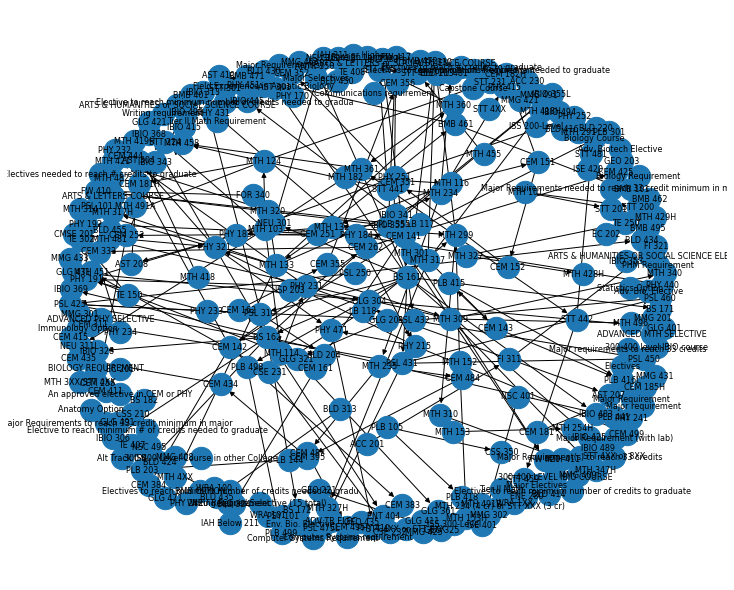

In [11]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8)
plt.show()

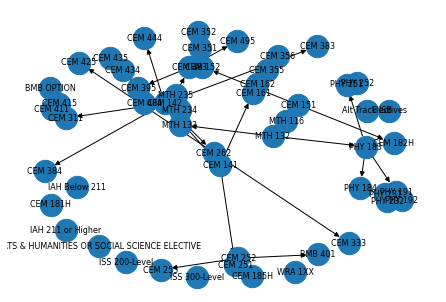

In [12]:
major = "Chemistry"
sub = G.subgraph(data[data["Major Title"] == major]["Course ID"])
nx.draw(sub, with_labels=True, node_size=500, font_size=8)
plt.show()

In [18]:
def choose_major(major = ''):
    majors = data["Major Title"].unique()
    
    if major == '':
        print('Available Majors: ')
        for m in majors:
            print('-', m)
        return
    
    if major not in majors:
        print("Not a valid Major. Please choose from the following: ")
        for m in majors:
                print("-", m)
        return 
    sub = G.subgraph(data[data["Major Title"] == major]["Course ID"])
    nx.draw(sub, with_labels=True, node_size=500, font_size=8)
    plt.show()


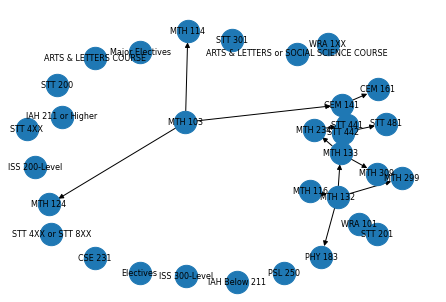

In [19]:
choose_major('Statistics, BA')


In [26]:
def find_majors_by_course(code):
    if code == '':
        codes = data['Course ID'].unique()
        print('No course code or invalid course code. Please choose from the following:')
        for c in codes:
            print('-', c)
    matches = data[data['Course ID'].str.lower() == code.lower()]
    if matches.empty:
        print('No courses matching ', code,'.')
        codes = data['Course ID'].unique()
        print('Please choose from the following list: ')
        for c in codes:
            print('-', c)
        return
        
    majors = matches['Major Title'].unique()
    print('Course ', code, 'is a part of the following majors: ')
    for m in majors:
        print('-',m)

In [20]:
def find_majors_by_course():
    code = input('Enter a course code: ')
    matches = data[data['Course ID'].str.lower() == code.lower()]
    
    if matches.empty:
        print('No courses matching ', code,'.')
        codes = data['Course ID'].unique()
        print('Please choose from the following list: ')
        for c in codes:
            print('-', c)
        return
    
    majors = matches['Major Title'].unique()
    print('Course ', code, 'is a part of the following majors: ')
    for m in majors:
        print('-',m)

In [15]:
data['Course ID'].unique()

array(['Electives', 'IAH Below 211', 'ISS 200-Level', 'WRA 1XX',
       'MTH 103', 'MTH 116', 'CEM 141', 'MTH 114', 'CEM 142', 'CEM 161',
       'MTH 132', 'CEM 162', 'ISS 300-Level', 'CEM 251', 'PHY 231',
       'CEM 252', 'CEM 262', 'MTH 133', 'PHY 232', 'CEM 255', 'PHY 251',
       'PHY 252', 'ARTS & HUMANITIES OR SOCIAL SCIENCE ELECTIVE',
       'Alt Track ISB', 'BMB OPTION', 'IAH 211 or Higher', 'CEM 383',
       'CEM 384', 'CEM 444', 'CEM 333', 'CEM 311', 'CEM 425', 'CEM 151',
       'CEM 152', 'CEM 181H', 'CEM 182H', 'CEM 185H', 'CEM 351',
       'PHY 183', 'CEM 352', 'CEM 355', 'MTH 234', 'PHY 184', 'PHY 191',
       'MTH 235', 'PHY 192', 'BMB 401', 'CEM 356', 'CEM 483', 'CEM 484',
       'CEM 395', 'CEM 411', 'CEM 415', 'CEM 495', 'CEM 434', 'CEM 435',
       'Foreign Language', 'PSL 250', 'MTH 299', 'MTH 3XX/STT 4XX',
       'MTH 309', 'MTH 310', 'MTH 340', 'MTH 411', 'MTH 4XX', 'MTH 320',
       'MTH 330', 'MTH 421', 'MTH 496', 'BS 161', 'BS 171', 'CSE 231',
       'CSE 232'

In [29]:
find_majors_by_course('300-400 Level Course in other College')


Course  300-400 Level Course in other College is a part of the following majors: 
- Zoology, BA
